In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.express as px

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df= pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
df.drop('Unnamed', axis=1, inplace=True)
# mapping name of coloumn to be understanding in visualization

class_labels = {

    5: 'eyes open',

    4: 'eyes closed',

    3: 'tumor region identified',

    2: 'EEG from tumor area',

    1: 'seizure activity'

}

df['y'] = df['y'].map(class_labels)

df['y'].head()

0         eyes closed
1    seizure activity
2           eyes open
3           eyes open
4           eyes open
Name: y, dtype: object

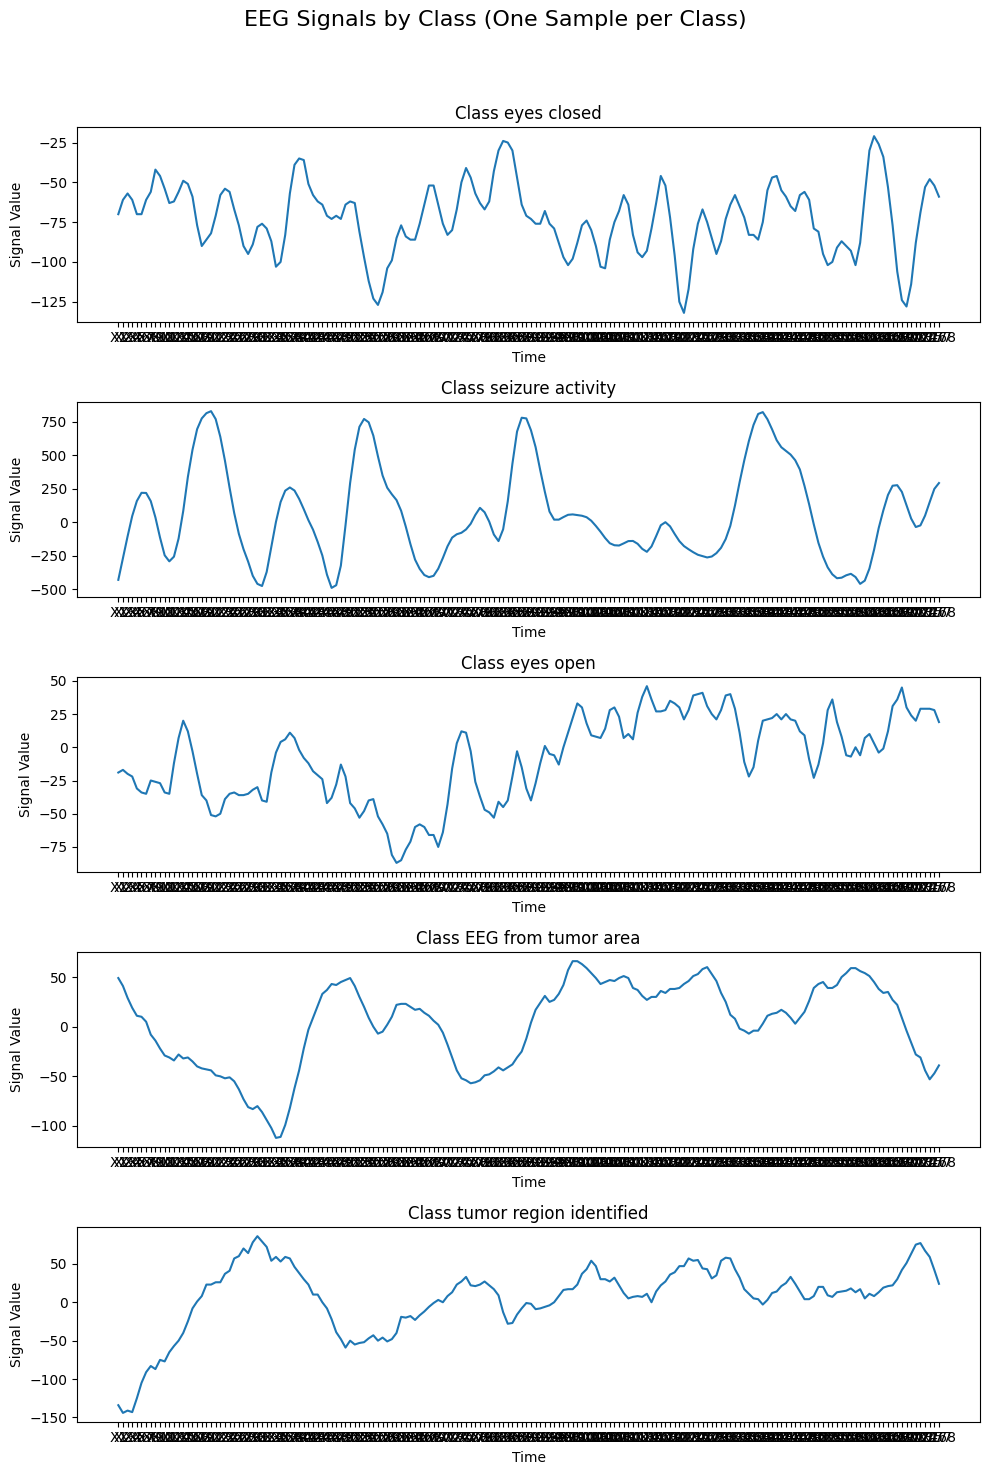

In [4]:
import matplotlib.pyplot as plt

# Get unique classes
unique_classes = df['y'].unique()

# Create subplots for each class with 1 column (1 sample per class)
fig, axes = plt.subplots(nrows=len(unique_classes), ncols=1, figsize=(10, 3 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize=16)

# Iterate over each class
for i, class_label in enumerate(unique_classes):
    class_data = df[df['y'] == class_label]
    
    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1).drop(columns='y')  # Exclude the 'y' column
    
    # Plot the sample
    axes[i].plot(random_sample.iloc[0, :])  # Now it plots only the numeric data
    axes[i].set_title(f'Class {class_label}', fontsize=12)
    axes[i].set_ylabel('Signal Value')
    axes[i].set_xlabel('Time')

# Adjust layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title

# Show the plot
plt.show()


In [5]:
# convert target column from object data type to numerical data type

dic = {'seizure activity': 1,

       'eyes open': 0 ,

       'eyes closed': 0,

       'tumor region identified': 0,

       'EEG from tumor area': 0}



df['y'] = df['y'].map(dic)

In [6]:
print(df['y'].value_counts())

df.head()

y
0    9200
1    2300
Name: count, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [24]:
import pandas as pd

# Assuming your DataFrame is named `df` and the label column is named 'label'
label_col = 'y'

# Separate the label column from the features
labels = df[label_col]
features = df.drop(columns=[label_col])

# Normalize only the feature columns
features_normalized = (features - features.mean()) / features.std()

# Combine the normalized features with the label column
df = pd.concat([features_normalized, labels], axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0.885013,1.209876,1.462701,1.439477,1.242312,0.818227,0.380894,-0.014266,-0.163189,-0.198406,...,-0.041629,-0.020281,-0.107126,-0.375726,-0.535921,-0.693828,-0.634116,-0.433272,-0.235389,0
1,2.400473,2.366087,2.239344,2.109165,2.037353,1.995946,1.941576,1.719027,1.546336,1.484504,...,1.057654,0.972799,0.942982,0.982869,1.018570,1.029250,1.023385,0.954199,0.856499,1
2,-0.123281,-0.169147,-0.225122,-0.172736,-0.149010,-0.179736,-0.312743,-0.409038,-0.484110,-0.547454,...,0.407802,0.455194,0.361566,0.193816,0.008151,-0.103232,-0.136866,-0.138587,-0.144398,0
3,-0.564033,-0.542507,-0.524771,-0.513781,-0.503051,-0.545449,-0.591436,-0.575582,-0.496453,-0.453959,...,-0.436398,-0.417513,-0.397834,-0.375726,-0.428302,-0.389397,-0.364005,-0.347322,-0.320314,0
4,0.015586,-0.325717,-0.537002,-0.575789,-0.434727,-0.254118,-0.058822,0.041248,-0.089130,-0.329299,...,0.085912,0.082037,0.005597,-0.108754,-0.165235,-0.316334,-0.431533,-0.470107,-0.368842,0


In [25]:
df1= df.copy()

df2= df.copy()

# Separate features and labels

X = df1.drop('y', axis=1).values  # Drop the label column 'y'

y = df1['y'].values



# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X169', 'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178'],
      dtype='object', length=178)


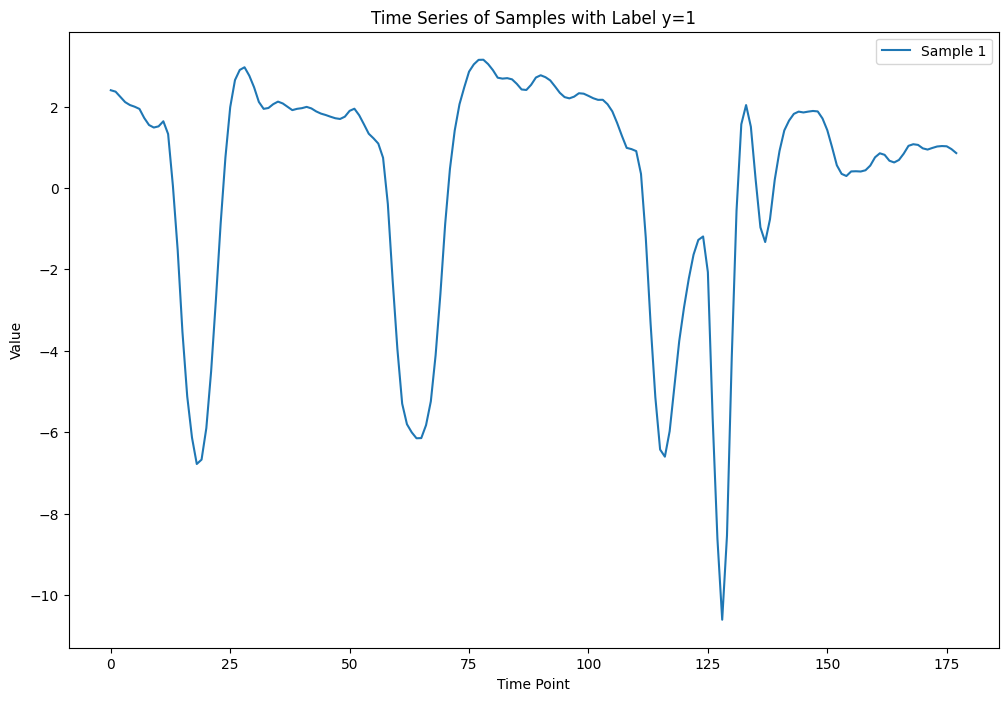

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Filter the DataFrame for samples where y == 1
df_positive = df[df['y'] == 1]

# Select a subset of samples to plot (e.g., first 5 samples with y = 1)
samples_to_plot = df_positive.head(1)

# Plot each sample as a time series
plt.figure(figsize=(12, 8))

for idx, row in samples_to_plot.iterrows():
    print(row.index[:-1])
    plt.plot(range(178), row.values[:-1], label=f'Sample {idx}')  # Exclude 'y' column
    plt.xlabel('Time Point')
    plt.ylabel('Value')
    plt.title('Time Series of Samples with Label y=1')

plt.legend()
# plt.grid()
plt.show()


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(input_dim, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.2)
        
        # Hidden layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc4 = nn.Linear(64, 32)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)
        
        # Output layer
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        # Input layer with ELU activation, BatchNorm, and Dropout
        x = F.elu(self.fc1(x))
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        
        # Hidden layers with ELU activation, BatchNorm, and Dropout
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        
        x = F.elu(self.fc4(x))
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        
        # Output layer with sigmoid activation for binary classification
        x = torch.sigmoid(self.output(x))
        
        return x

# Model instantiation
input_dim = X_train.shape[1]  # Assuming X_train is available
model = ANNModel(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [40]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.75, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        # Convert inputs to probabilities
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        # Apply focal loss modulation
        pt = torch.exp(-BCE_loss)  # pt is the predicted probability
        focal_loss = (self.alpha * (1 - pt) ** self.gamma * BCE_loss).mean()
        return focal_loss

# Usage example
criterion = FocalLoss(alpha=0.75, gamma=2)

In [42]:
# Define training parameters
num_epochs = 20
batch_size = 64  # Adjust as needed
best_val_loss = float('inf')



# Convert training data to PyTorch tensors
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32)



# Create a DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


val_data = torch.tensor(X_test, dtype=torch.float32)
val_labels = torch.tensor(y_test, dtype=torch.float32)
val_dataset = torch.utils.data.TensorDataset(val_data, val_labels)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze()  # Remove extra dimension if necessary
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to compute gradients during validation
        for inputs, labels in val_loader:
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            # Calculate accuracy
            predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        if val_loss < best_val_loss:
            best_val_loss = val_loss  # Update best validation loss
            print("Validation loss improved, saving model weights...")
            torch.save(model.state_dict(), 'best_model.pth') 
        
    # Print epoch results
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {running_loss/len(train_loader):.4f}, "
          f"Val Loss: {val_loss/len(val_loader):.4f}, "
          f"Val Accuracy: {100 * correct / total:.2f}%")

print("Training complete.")


Epoch [1/20], Loss: 0.1145
Validation loss improved, saving model weights...
Epoch [1/20], Train Loss: 0.1145, Val Loss: 0.1133, Val Accuracy: 94.57%
Epoch [2/20], Loss: 0.1132
Validation loss improved, saving model weights...
Epoch [2/20], Train Loss: 0.1132, Val Loss: 0.1122, Val Accuracy: 95.26%
Epoch [3/20], Loss: 0.1129
Epoch [3/20], Train Loss: 0.1129, Val Loss: 0.1122, Val Accuracy: 95.43%
Epoch [4/20], Loss: 0.1124
Epoch [4/20], Train Loss: 0.1124, Val Loss: 0.1122, Val Accuracy: 95.13%
Epoch [5/20], Loss: 0.1117
Validation loss improved, saving model weights...
Epoch [5/20], Train Loss: 0.1117, Val Loss: 0.1112, Val Accuracy: 96.65%
Epoch [6/20], Loss: 0.1116
Epoch [6/20], Train Loss: 0.1116, Val Loss: 0.1125, Val Accuracy: 95.00%
Epoch [7/20], Loss: 0.1117
Epoch [7/20], Train Loss: 0.1117, Val Loss: 0.1121, Val Accuracy: 95.48%
Epoch [8/20], Loss: 0.1114
Epoch [8/20], Train Loss: 0.1114, Val Loss: 0.1118, Val Accuracy: 95.65%
Epoch [9/20], Loss: 0.1114
Epoch [9/20], Train Los

Validation Loss: 0.1110, Accuracy: 96.78%


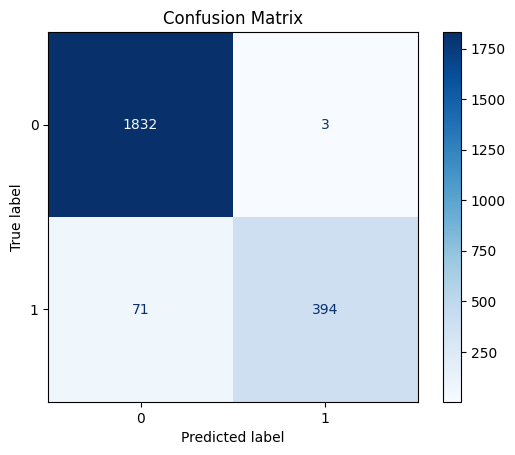

In [43]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the best model weights
model.load_state_dict(torch.load('best_model.pth'))
model.eval() 

# Initialize variables for evaluation
val_loss = 0.0
all_predictions = []
all_labels = []
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in val_loader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        
        # Collect predictions and labels
        predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())
        
        # Calculate accuracy
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Convert lists to numpy arrays for confusion matrix
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Print final evaluation results
average_val_loss = val_loss / len(val_loader)
accuracy = 100 * correct / total
print(f"Validation Loss: {average_val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [74]:
X_ch=pd.read_csv('smoothed_values.csv').values

(1, 178)
[[0.92251816 0.92736077 0.91041162 0.89830508 0.88861985 0.86440678
  0.86924939 0.86924939 0.84503632 0.37046005 0.3535109  0.33414044
  0.37046005 0.30992736 0.29782082 0.29782082 0.30024213 0.33898305
  0.34140436 0.37046005 0.3535109  0.46489104 0.56658596 0.89830508
  0.89830508 0.92736077 0.93946731 0.90072639 0.94673123 0.91525424
  0.91283293 0.95157385 0.95883777 0.96610169 0.94915254 0.92493947
  0.91525424 0.89830508 0.89346247 0.90072639 0.89346247 0.88861985
  0.88377724 0.88377724 0.88135593 0.89104116 0.89588378 0.88377724
  0.87651332 0.87893462 0.86924939 0.82324455 0.83535109 0.82566586
  0.81840194 0.81113801 0.7433414  0.59564165 0.63438257 0.48910412
  0.39225182 0.40435835 0.37288136 0.36319613 0.34140436 0.33898305
  0.34140436 0.36561743 0.40193705 0.44794189 0.42615012 0.49636804
  0.44552058 0.72639225 0.80387409 0.87409201 0.88861985 0.85230024
  0.89830508 0.92736077 0.95883777 0.96610169 0.97336562 0.98062954
  0.97820823 0.968523   0.95641646 0.95

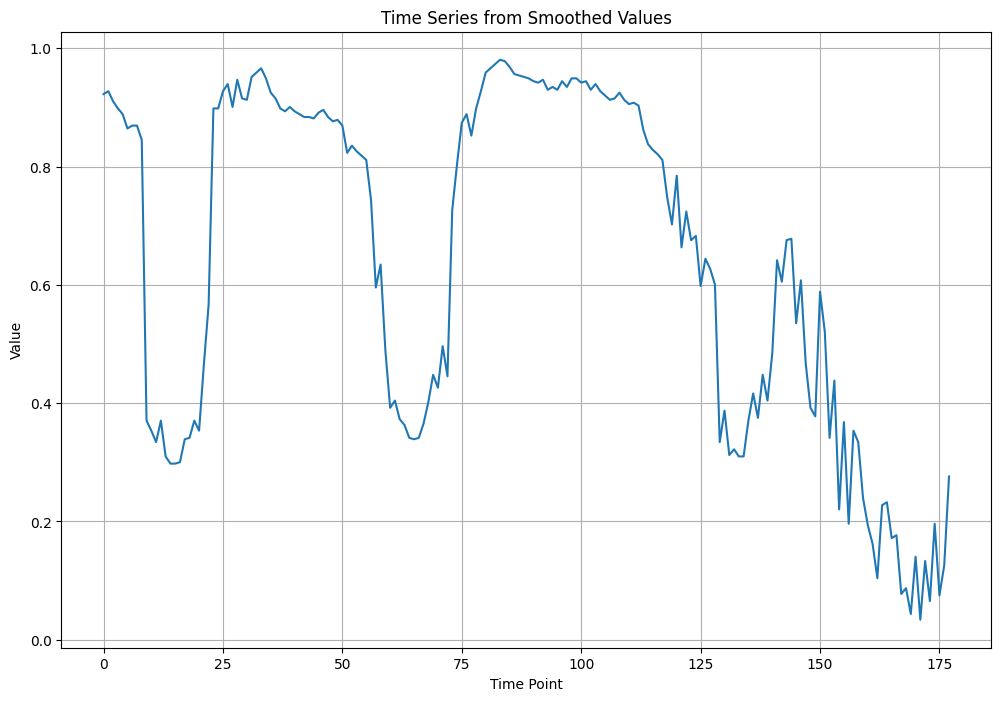

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

X_ch = pd.read_csv('smoothed_values.csv', header=None).values  # Load without headers

# Check the shape and content of X_ch
print(X_ch.shape)  # Should print (1, 178) if there's one row
print(X_ch)        # Print the values for debugging

# If it's a single row, flatten it to 1D
X_ch_flat = X_ch.flatten()  # This will convert it to a 1D array if it's originally 2D

# Plot the values directly without specifying x-values
plt.figure(figsize=(12, 8))
plt.plot(X_ch_flat)  # Plot the flattened values

plt.xlabel('Time Point')  # Add x-axis label
plt.ylabel('Value')       # Add y-axis label
plt.title('Time Series from Smoothed Values')  # Title of the plot
plt.grid()               # Add grid lines for better readability
plt.show()     

In [100]:
outputs=model(torch.tensor(X_ch, dtype=torch.float32)).squeeze()
# predicted = (outputs >= 0.5).float()

print(outputs)

tensor(1.8297e-06, grad_fn=<SqueezeBackward0>)
